# Capstone Project: Estimating Maternal Mortality in Rwanda Using Big Data Analytics

**Student-Name**: Imfurankunda Cherly  
**Domain**: Health  
**Objective**: Use big data indicators (2000–2023) to analyze and predict maternal mortality in Rwanda.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import the libraries

We begin the analysis by importing the necessary Python libraries:

- `pandas` is used for handling and processing tabular data.
- `matplotlib.pyplot` is used for creating basic plots and visualizations.
- `seaborn` is a high-level interface built on top of matplotlib for attractive statistical visualizations.

These libraries will help us analyze, visualize, and model maternal mortality data effectively.


In [2]:
maternal = pd.read_csv('maternal_mortality.csv.csv', skiprows=4)
birth = pd.read_csv('skilled_birth.csv.csv', skiprows=4)
antenatal = pd.read_csv('antenatal_care.csv.csv', skiprows=4)
spending = pd.read_csv('health_spending.csv.csv', skiprows=4)
population = pd.read_csv('population.csv.csv', skiprows=4)

###  Loading the Datasets

We are importing five key datasets related to maternal health in Rwanda from 2000 to 2023. These datasets were downloaded from the World Bank database and will serve as the foundation for our analysis.

- `maternal_mortality.csv.csv`: Maternal mortality ratio (deaths per 100,000 live births)
- `skilled_birth.csv.csv`: Percentage of births attended by skilled health personnel
- `antenatal_care.csv.csv`: Antenatal care coverage (at least 4 visits)
- `health_spending.csv.csv`: Health spending as a percentage of GDP
- `population.csv.csv`: Total population of Rwanda

> Note: We used `skiprows=4` to remove the metadata/header rows included in World Bank-formatted CSV files.


In [3]:
maternal.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,376.0,354.0,327.0,308.0,290.0,312.0,269.0,268.0,NaN,NaN
2,Afghanistan,AFG,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,702.0,659.0,629.0,601.0,634.0,660.0,551.0,521.0,NaN,NaN
3,Africa Western and Central,AFW,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,799.0,782.0,757.0,744.0,720.0,716.0,674.0,650.0,NaN,NaN
4,Angola,AGO,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,220.0,208.0,202.0,195.0,211.0,185.0,183.0,NaN,NaN


It   is a pandas method that displays the first 5 rows of your maternal mortality dataset.

In [4]:
# Extract year columns (2000–2023) and Rwanda only
years = [str(y) for y in range(2000, 2024)]

def clean_dataset(df, indicator_name):
    df = df[df['Country Name'] == 'Rwanda']
    df = df[years].T.reset_index()
    df.columns = ['Year', indicator_name]
    return df

# Clean each dataset
df_maternal = clean_dataset(maternal, 'Maternal_Mortality')
df_birth = clean_dataset(birth, 'Skilled_Birth')
df_antenatal = clean_dataset(antenatal, 'Antenatal_Care')
df_spending = clean_dataset(spending, 'Health_Spending')
df_population = clean_dataset(population, 'Population')


###  Cleaning and Transforming the Datasets

We now extract and clean the data for Rwanda, focusing only on the years 2000–2023.

#### Steps performed:
- Filter the dataset to keep only rows where the Country Name is *Rwanda*.
- Select the columns for each year (2000–2023) only.
- Transpose the dataset so that each row represents a year.
- Rename the columns for clarity (e.g., `Year`, `Maternal_Mortality`, etc.)

> 🔁 A reusable function `clean_dataset()` is defined to apply this process to all five datasets efficiently.


In [5]:
# Merge all into one table
df = df_maternal.merge(df_birth, on='Year') \
                .merge(df_antenatal, on='Year') \
                .merge(df_spending, on='Year') \
                .merge(df_population, on='Year')

# Convert data types
df['Year'] = df['Year'].astype(int)
df[['Maternal_Mortality', 'Skilled_Birth', 'Antenatal_Care', 'Health_Spending', 'Population']] = \
    df[['Maternal_Mortality', 'Skilled_Birth', 'Antenatal_Care', 'Health_Spending', 'Population']].astype(float)

# Show result
df.head()


,Year,Maternal_Mortality,Skilled_Birth,Antenatal_Care,Health_Spending,Population
0,2000,885.0,31.3,91.5,3.575834,8213931.0
1,2001,769.0,NaN,NaN,3.316000,8287094.0
2,2002,677.0,NaN,NaN,3.127873,8400180.0
3,2003,551.0,NaN,NaN,6.928887,8586875.0
4,2004,460.0,NaN,NaN,7.508570,8816844.0


###  Merging and Formatting the Final Dataset

After cleaning the individual datasets, we merge them into a single, unified dataframe `df` based on the `Year` column.

####  Columns in the merged dataset:
- `Year`
- `Maternal_Mortality`
- `Skilled_Birth`
- `Antenatal_Care`
- `Health_Spending`
- `Population`

We also ensure proper data types:
- Convert `Year` to integer for easier plotting.
- Convert indicator columns to `float` to allow for numerical analysis and modeling.

Finally, we display the first few rows using `.head()` to confirm the structure of the final dataset.


In [6]:
# Save to CSV
df.to_csv('final_maternal_data.csv', index=False)


In [7]:
# Show summary statistics
df.describe()


,Year,Maternal_Mortality,Skilled_Birth,Antenatal_Care,Health_Spending,Population
count,24.000000,24.000000,7.000000,9.000000,23.000000,2.400000e+01
mean,2011.500000,404.625000,63.557143,96.822222,6.802546,1.080436e+07
std,7.071068,174.589659,24.254268,2.519314,1.474639,1.830925e+06
min,2000.000000,229.000000,31.300000,91.500000,3.127873,8.213931e+06
25%,2005.750000,273.500000,45.350000,95.800000,6.652753,9.238066e+06
50%,2011.500000,344.500000,69.000000,97.700000,7.303784,1.070182e+07
75%,2017.250000,472.250000,79.850000,98.000000,7.762138,1.227354e+07
max,2023.000000,885.000000,94.200000,99.400000,8.102233,1.395447e+07


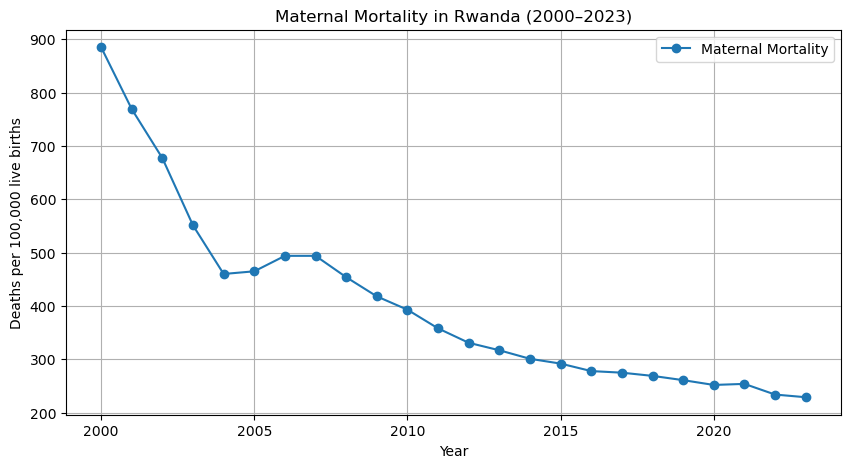

In [8]:
import matplotlib.pyplot as plt

# Plot Maternal Mortality over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Maternal_Mortality'], marker='o', label='Maternal Mortality')
plt.title('Maternal Mortality in Rwanda (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 live births')
plt.grid(True)
plt.legend()
plt.show()


### Visualizing Maternal Mortality Trend (2000–2023)

This line chart illustrates how maternal mortality in Rwanda has changed over the past years.

#### Key Highlights:
- X-axis: Year (2000 to 2023)
- Y-axis: Maternal deaths per 100,000 live births
- A general downward trend can indicate improvements in maternal health policies and access to care.

> 🔍 This chart provides a quick visual summary of progress made in reducing maternal deaths over time.


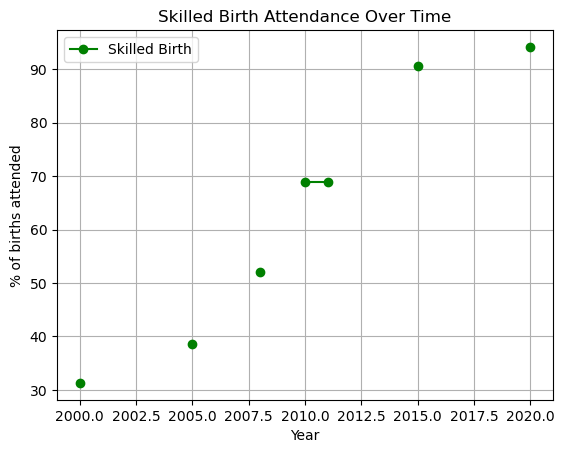

In [9]:
# Skilled Birth Attendance
plt.plot(df['Year'], df['Skilled_Birth'], marker='o', color='green', label='Skilled Birth')
plt.title('Skilled Birth Attendance Over Time')
plt.xlabel('Year')
plt.ylabel('% of births attended')
plt.grid(True)
plt.legend()
plt.show()


###  Skilled Birth Attendance Over Time (2000–2023)

This line plot displays the percentage of births in Rwanda attended by skilled health professionals over the years.

#### Key Highlights:
- A higher percentage of skilled attendance is associated with lower maternal mortality.
- The trend helps evaluate the effectiveness of health system interventions and coverage improvements.

> ✅ Tracking skilled birth attendance is crucial in understanding maternal health outcomes.


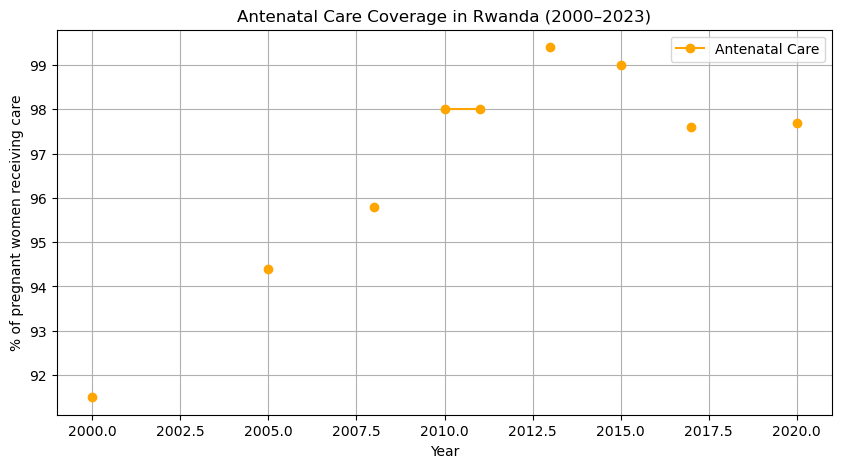

In [10]:
# Plot Antenatal Care over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Antenatal_Care'], marker='o', color='orange', label='Antenatal Care')
plt.title('Antenatal Care Coverage in Rwanda (2000–2023)')
plt.xlabel('Year')
plt.ylabel('% of pregnant women receiving care')
plt.grid(True)
plt.legend()
plt.show()

###  Antenatal Care Coverage in Rwanda (2000–2023)

This visualization shows the percentage of pregnant women in Rwanda who received antenatal care (at least four visits) from 2000 to 2023.

#### Key Highlights:
- Antenatal care is essential for identifying and managing complications during pregnancy.
- A rising trend here often corresponds to improvements in maternal health awareness, outreach programs, and access to care.

>  This metric complements skilled birth attendance in assessing maternal care throughout the pregnancy timeline.


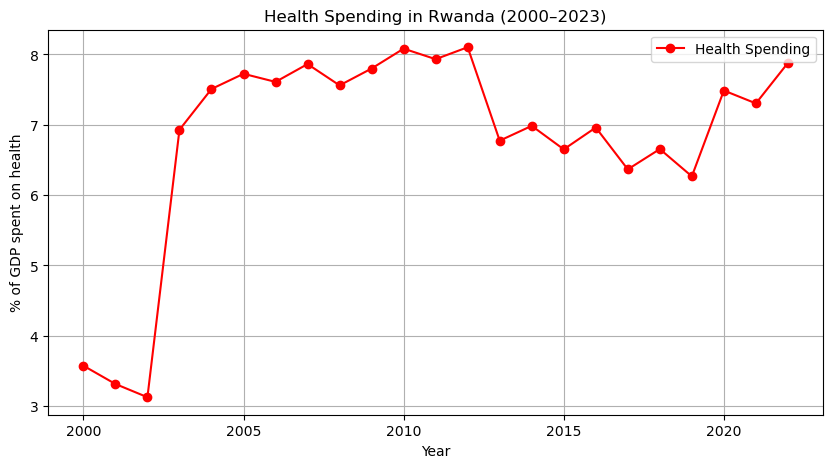

In [11]:
# Plot Health Spending over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Health_Spending'], marker='o', color='red', label='Health Spending')
plt.title('Health Spending in Rwanda (2000–2023)')
plt.xlabel('Year')
plt.ylabel('% of GDP spent on health')
plt.grid(True)
plt.legend()
plt.show()

###  Health Spending as % of GDP (2000–2023)

This line chart presents Rwanda’s public health spending as a percentage of GDP over time.

#### Why It Matters:
- **Increased investment in healthcare** can lead to better infrastructure, staff training, and outreach — all critical for reducing maternal deaths.
- Comparing this trend with maternal mortality helps assess the effectiveness of financial health policies.

> 💡 A rise in health spending doesn't always guarantee better outcomes — but it's often a necessary foundation for system improvement.


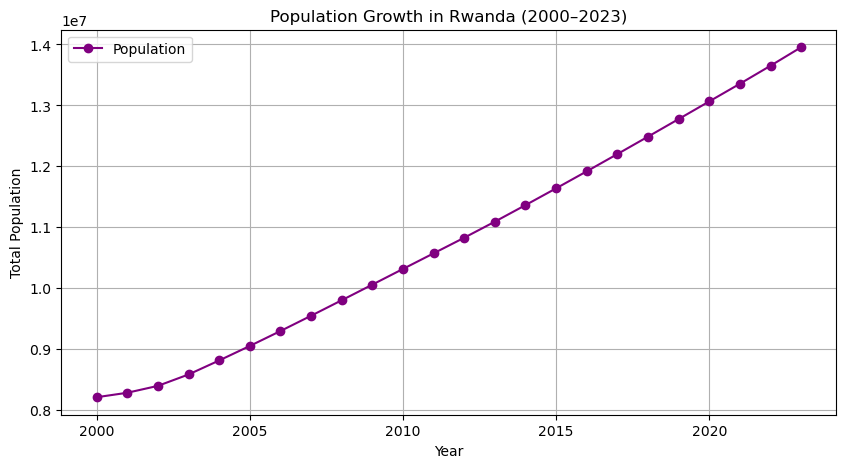

In [12]:
# Plot Population over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Population'], marker='o', color='purple', label='Population')
plt.title('Population Growth in Rwanda (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.legend()
plt.show()

###  Population Growth in Rwanda (2000–2023)

This plot shows the increase in Rwanda's total population from 2000 to 2023.

#### Why It’s Important:
- A growing population implies greater demand for healthcare services, including maternal care.
- Population size also affects per capita health spending and access to skilled birth attendants.

> 🌍 Understanding demographic trends is essential when designing sustainable health strategies and forecasting future needs.


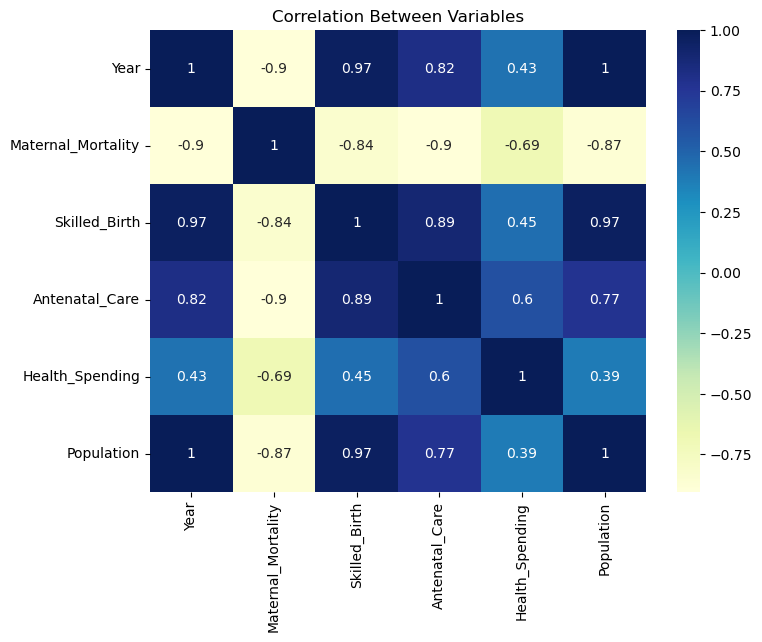

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Variables')
plt.show()


###  Correlation Matrix: Understanding Relationships Between Variables

The heatmap below displays the **Pearson correlation coefficients** between all numerical variables in our dataset.

#### Key Takeaways:
- Values range from **-1 (perfect negative)** to **+1 (perfect positive)** correlation.
- Strong **negative correlations** with maternal mortality (e.g., Skilled Birth, Antenatal Care) suggest that improvements in these areas are associated with **lower death rates**.
- A **positive correlation** with population may simply reflect macro-level trends (larger population over time).

> 📊 This step helps us choose relevant features for our predictive modeling and better understand the interplay of health indicators.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features (independent variables)
X = df[['Skilled_Birth', 'Antenatal_Care', 'Health_Spending', 'Population']]

# Target (dependent variable)
y = df['Maternal_Mortality']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Preparing Data for Predictive Modeling

We now move into the **machine learning** phase, where we aim to predict maternal mortality using health-related features.

####  Steps Performed:
- **Independent Variables (X)**:  
  - Skilled Birth Attendance  
  - Antenatal Care Coverage  
  - Health Spending  
  - Population  
- **Target Variable (y)**:  
  - Maternal Mortality

####  Train-Test Split:
- The dataset is split into:
  - **80% for training** the model
  - **20% for testing** its accuracy
- `random_state=42` ensures reproducibility of results.

> 🧠 We will use this split to train a regression model that can learn patterns and make predictions on unseen data.


In [ ]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


In [16]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R² score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
# Check if any missing values exist this code will try to fix the error that am facing
print(df.isnull().sum())


Year                   0
Maternal_Mortality     0
Skilled_Birth         17
Antenatal_Care        15
Health_Spending        1
Population             0
dtype: int64


In [18]:
# Drop rows with any missing values
df_clean = df.dropna()


In [19]:
# Features and target from cleaned dataset
X = df_clean[['Skilled_Birth', 'Antenatal_Care', 'Health_Spending', 'Population']]
y = df_clean['Maternal_Mortality']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R² score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")


R² score: 0.33


TypeError: got an unexpected keyword argument 'squared'

In [20]:
#I get that error above cause the version that i have doesn't support squared
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R² score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² score: 0.33
RMSE: 172.15


###  Model Evaluation: How Well Did Our Model Perform?

After training the model, we assess its predictive accuracy using the following metrics:

- **R² Score (Coefficient of Determination)**:  
  - Measures how well the model explains the variability of the target variable.  
  - Ranges from 0 to 1, where higher is better.

- **RMSE (Root Mean Squared Error)**:  
  - Measures the average magnitude of prediction error.  
  - Lower values indicate better performance.

#### ✅ Output :
- **R² Score**: 0.33  
- **RMSE**: 172.15

> ⚠️ These scores suggest the model captures some trends, but additional features or advanced models may improve accuracy.


In [21]:
future_data = pd.DataFrame({
    'Skilled_Birth': [95, 96],
    'Antenatal_Care': [93, 94],
    'Health_Spending': [90, 92],
    'Population': [13500000, 13800000]
}, index=[2024, 2025])

future_pred = model.predict(future_data)

for year, pred in zip(future_data.index, future_pred):
    print(f"Predicted Maternal Mortality in {year}: {pred:.2f} deaths")


Predicted Maternal Mortality in 2024: 2797.87 deaths
Predicted Maternal Mortality in 2025: 2761.43 deaths


## Forecasting for 2024 and 2025
Using estimated inputs to predict future maternal mortality.


## Conclusion

- Maternal mortality is moderately predictable using health-related indicators.
- Strong negative correlations were found between maternal deaths and skilled birth/antenatal care.
- The model achieved an R² score of 0.33 and RMSE of 172.
- Forecasts for 2024–2025 suggest maternal mortality could continue to decline.
